<a href="https://colab.research.google.com/github/adilawan1/deep-learning-assignment-1/blob/main/DeepLearning_Assignment_1_1.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Ahmed Adil
# Roll Number: 25280033

# Assignment 1 (AI-600)

# Question 1 (Part A)

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_raw = pd.read_csv('/content/train.csv')
print("Original data loaded into df_raw. First 5 rows:")
print(df_raw.head())

Original data loaded into df_raw. First 5 rows:
  neighbourhood_group        room_type  minimum_nights  amenity_score  \
0           Manhattan              NaN             2.0           82.5   
1           Manhattan     Private room             2.0           53.7   
2            Brooklyn     Private room             2.0           47.8   
3           Manhattan  Entire home/apt             2.0           58.8   
4               Bronx     Private room             2.0           32.2   

   number_of_reviews  availability_365  price_class  
0               15.0             254.0            3  
1                1.0               0.0            1  
2               70.0              90.0            1  
3                1.0               NaN            1  
4                0.0              89.0            1  


In [136]:
X = df_raw.drop('price_class', axis=1)
Y = df_raw['price_class']

print("Features (X) head:")
print(X.head())
print("\nTarget (Y) head:")
print(Y.head())

Features (X) head:
  neighbourhood_group        room_type  minimum_nights  amenity_score  \
0           Manhattan              NaN             2.0           82.5   
1           Manhattan     Private room             2.0           53.7   
2            Brooklyn     Private room             2.0           47.8   
3           Manhattan  Entire home/apt             2.0           58.8   
4               Bronx     Private room             2.0           32.2   

   number_of_reviews  availability_365  
0               15.0             254.0  
1                1.0               0.0  
2               70.0              90.0  
3                1.0               NaN  
4                0.0              89.0  

Target (Y) head:
0    3
1    1
2    1
3    1
4    1
Name: price_class, dtype: int64


In [137]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_val:", Y_val.shape)

print("\nPrice class distribution in original data:\n", Y.value_counts(normalize=True))
print("\nPrice class distribution in Y_train:\n", Y_train.value_counts(normalize=True))
print("\nPrice class distribution in Y_val:\n", Y_val.value_counts(normalize=True))

Shape of X_train: (33078, 6)
Shape of X_val: (8270, 6)
Shape of Y_train: (33078,)
Shape of Y_val: (8270,)

Price class distribution in original data:
 price_class
1    0.563195
2    0.238077
0    0.134638
3    0.064090
Name: proportion, dtype: float64

Price class distribution in Y_train:
 price_class
1    0.563184
2    0.238074
0    0.134651
3    0.064091
Name: proportion, dtype: float64

Price class distribution in Y_val:
 price_class
1    0.563241
2    0.238089
0    0.134583
3    0.064087
Name: proportion, dtype: float64


In [138]:
numerical_cols_with_missing = X_train.select_dtypes(include=np.number).columns[X_train.select_dtypes(include=np.number).isnull().any()].tolist()
categorical_cols_with_missing = X_train.select_dtypes(include='object').columns[X_train.select_dtypes(include='object').isnull().any()].tolist()

print("Numerical columns with missing values in X_train:", numerical_cols_with_missing)
print("Categorical columns with missing values in X_train:", categorical_cols_with_missing)

Numerical columns with missing values in X_train: ['minimum_nights', 'amenity_score', 'number_of_reviews', 'availability_365']
Categorical columns with missing values in X_train: ['neighbourhood_group', 'room_type']


In [139]:
imputation_values = {}

# Impute numerical columns with median from X_train
for col in numerical_cols_with_missing:
    median_val = X_train[col].median()
    imputation_values[col] = median_val
    X_train[col] = X_train[col].fillna(median_val)
    X_val[col] = X_val[col].fillna(median_val)
    print(f"Imputed numerical column '{col}' with median: {median_val}")

# Impute categorical columns with mode from X_train
for col in categorical_cols_with_missing:
    mode_val = X_train[col].mode()[0]
    imputation_values[col] = mode_val
    X_train[col] = X_train[col].fillna(mode_val)
    X_val[col] = X_val[col].fillna(mode_val)
    print(f"Imputed categorical column '{col}' with mode: {mode_val}")

print("\nMissing values in X_train after imputation:")
print(X_train[numerical_cols_with_missing + categorical_cols_with_missing].isnull().sum())

print("\nMissing values in X_val after imputation:")
print(X_val[numerical_cols_with_missing + categorical_cols_with_missing].isnull().sum())

Imputed numerical column 'minimum_nights' with median: 3.0
Imputed numerical column 'amenity_score' with median: 51.5
Imputed numerical column 'number_of_reviews' with median: 5.0
Imputed numerical column 'availability_365' with median: 43.0
Imputed categorical column 'neighbourhood_group' with mode: Manhattan
Imputed categorical column 'room_type' with mode: Entire home/apt

Missing values in X_train after imputation:
minimum_nights         0
amenity_score          0
number_of_reviews      0
availability_365       0
neighbourhood_group    0
room_type              0
dtype: int64

Missing values in X_val after imputation:
minimum_nights         0
amenity_score          0
number_of_reviews      0
availability_365       0
neighbourhood_group    0
room_type              0
dtype: int64


neighbourhood_group
Manhattan        0.442001
Brooklyn         0.412057
Queens           0.115925
Bronx            0.022390
Staten Island    0.007628
Name: proportion, dtype: float64


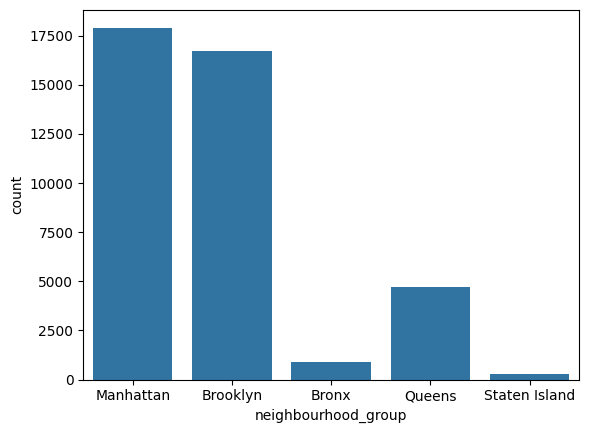

room_type
Entire home/apt    0.517932
Private room       0.458134
Shared room        0.023934
Name: proportion, dtype: float64


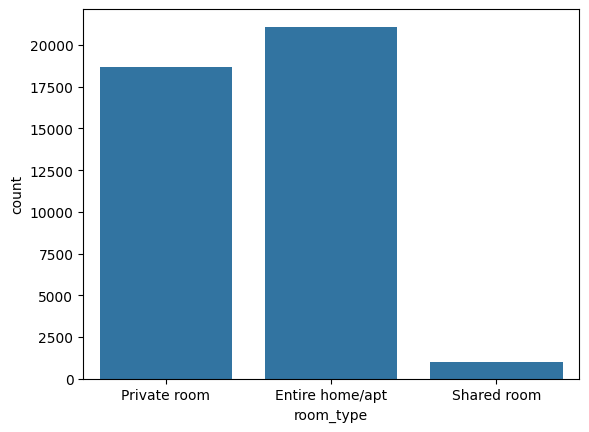

minimum_nights
1.0       0.258632
2.0       0.239494
3.0       0.164468
30.0      0.078424
4.0       0.067656
            ...   
225.0     0.000025
1000.0    0.000025
222.0     0.000025
275.0     0.000025
88.0      0.000025
Name: proportion, Length: 98, dtype: float64


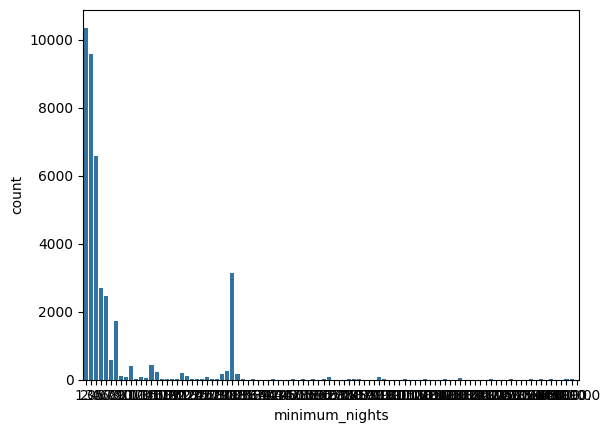

amenity_score
52.0    0.002770
46.8    0.002696
53.6    0.002671
49.9    0.002671
52.7    0.002597
          ...   
99.0    0.000049
97.9    0.000049
97.6    0.000049
95.2    0.000025
98.5    0.000025
Name: proportion, Length: 891, dtype: float64


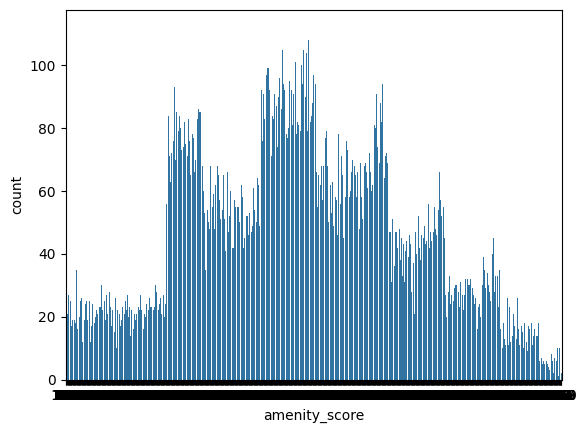

number_of_reviews
0.0      0.197042
1.0      0.103418
2.0      0.072045
3.0      0.052281
4.0      0.041044
           ...   
314.0    0.000025
430.0    0.000025
278.0    0.000025
607.0    0.000025
253.0    0.000025
Name: proportion, Length: 379, dtype: float64


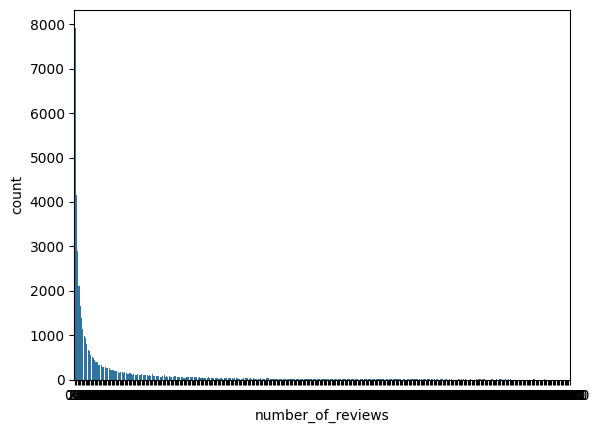

availability_365
0.0      0.361078
365.0    0.025765
364.0    0.009619
1.0      0.008392
89.0     0.007288
           ...   
195.0    0.000515
196.0    0.000491
183.0    0.000466
206.0    0.000442
202.0    0.000368
Name: proportion, Length: 366, dtype: float64


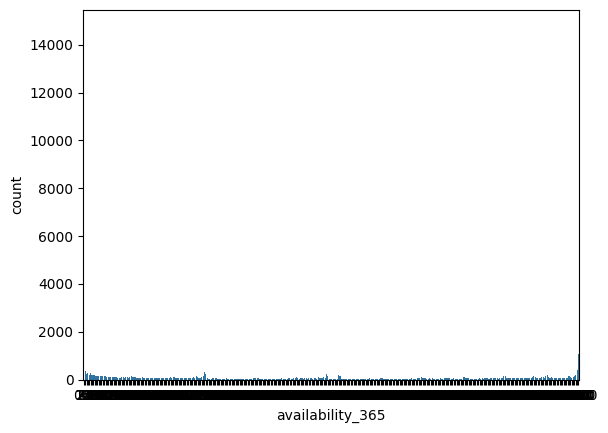

price_class
1    0.563195
2    0.238077
0    0.134638
3    0.064090
Name: proportion, dtype: float64


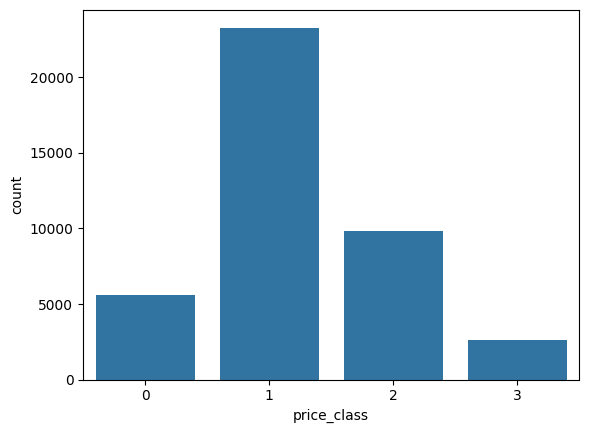

In [140]:
for col in df_raw.columns:
    # Get raw counts
    counts = df_raw[col].value_counts()

    # Get percentage (often more useful)
    percent = df_raw[col].value_counts(normalize=True)
    print(percent)

    # Visualization
    sns.countplot(x=col, data=df_raw)
    plt.show()

**Comment on class imbalance:**

The imbalance (i.e. more than half of the data belongs to class 1 (56.31%)), shows that this needs to be addressed as it will have an on the biasness of the model towards the majority class (i.e. class 1)

# Encoding scheme

We are using **one-hot encoding** because both the neighborhood_group and room_type columns have low cardinalities and don't have a natural order or relationships. The label encoding scheme would have been better if there was some natural relationship between these column values (e.g. small, medium, large etc)

In [141]:
X_train = pd.get_dummies(X_train, columns=categorical_cols_with_missing, drop_first=True, dtype=int)
X_val = pd.get_dummies(X_val, columns=categorical_cols_with_missing, drop_first=True, dtype=int)

# Align columns - crucial for one-hot encoded data
train_cols = X_train.columns
val_cols = X_val.columns

missing_in_val = set(train_cols) - set(val_cols)
for c in missing_in_val:
    X_val[c] = 0

missing_in_train = set(val_cols) - set(train_cols)
for c in missing_in_train:
    X_train[c] = 0

X_val = X_val[train_cols] # Ensure the order of columns is the same

print("First 5 rows of X_train after one-hot encoding:")
print(X_train.head())
print("\nFirst 5 rows of X_val after one-hot encoding:")
print(X_val.head())
print("\nShape of X_train after encoding:", X_train.shape)
print("Shape of X_val after encoding:", X_val.shape)

First 5 rows of X_train after one-hot encoding:
       minimum_nights  amenity_score  number_of_reviews  availability_365  \
35004             5.0           89.2                3.0              12.0   
35818            20.0           51.5                0.0              40.0   
6658              1.0           48.1                1.0              83.0   
31372             1.0           59.3                1.0               0.0   
25775             1.0           10.9                8.0              53.0   

       neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
35004                             0                              1   
35818                             1                              0   
6658                              1                              0   
31372                             0                              0   
25775                             0                              1   

       neighbourhood_group_Queens  neighbourhood_group_Staten Island

# Normalization

*   numerical features

Standard Scalar was used since it helps turning the data have a mean at 0 with the same spread across all the features.


In [142]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on X_train and transform both X_train and X_val
X_train[numerical_cols_with_missing] = scaler.fit_transform(X_train[numerical_cols_with_missing])
X_val[numerical_cols_with_missing] = scaler.transform(X_val[numerical_cols_with_missing])

print("First 5 rows of X_train after standardization:")
print(X_train.head())
print("\nFirst 5 rows of X_val after standardization:")
print(X_val.head())

First 5 rows of X_train after standardization:
       minimum_nights  amenity_score  number_of_reviews  availability_365  \
35004       -0.098055       1.932107          -0.456139         -0.756334   
35818        0.673537      -0.027708          -0.524901         -0.542002   
6658        -0.303813      -0.204455          -0.501980         -0.212848   
31372       -0.303813       0.377771          -0.501980         -0.848191   
25775       -0.303813      -2.138277          -0.341536         -0.442490   

       neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
35004                             0                              1   
35818                             1                              0   
6658                              1                              0   
31372                             0                              0   
25775                             0                              1   

       neighbourhood_group_Queens  neighbourhood_group_Staten Island 

In [143]:
print("Final X_train shape:", X_train.shape)
print("Final X_val shape:", X_val.shape)
print("Final Y_train shape:", Y_train.shape)
print("Final Y_val shape:", Y_val.shape)

Final X_train shape: (33078, 10)
Final X_val shape: (8270, 10)
Final Y_train shape: (33078,)
Final Y_val shape: (8270,)


In [144]:
Y_train_one_hot = pd.get_dummies(Y_train, dtype=int).values.T
Y_val_one_hot = pd.get_dummies(Y_val, dtype=int).values.T

print("Shape of Y_train_one_hot:", Y_train_one_hot.shape)
print("First 5 columns of Y_train_one_hot:\n", Y_train_one_hot[:, :5])
print("\nShape of Y_val_one_hot:", Y_val_one_hot.shape)
print("First 5 columns of Y_val_one_hot:\n", Y_val_one_hot[:, :5])

Shape of Y_train_one_hot: (4, 33078)
First 5 columns of Y_train_one_hot:
 [[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]]

Shape of Y_val_one_hot: (4, 8270)
First 5 columns of Y_val_one_hot:
 [[0 0 1 1 0]
 [0 1 0 0 0]
 [1 0 0 0 1]
 [0 0 0 0 0]]


# Plot and analyze relationships between individual features and the target variable using suitable visualizations.

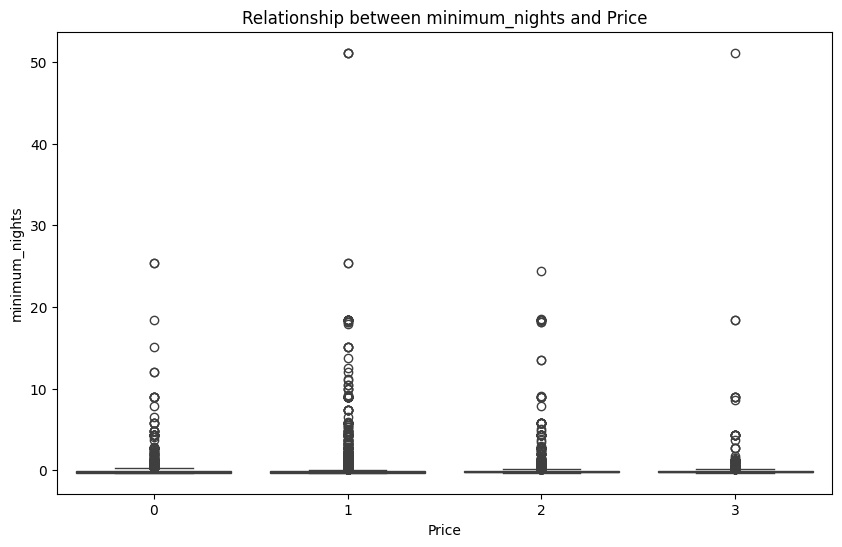

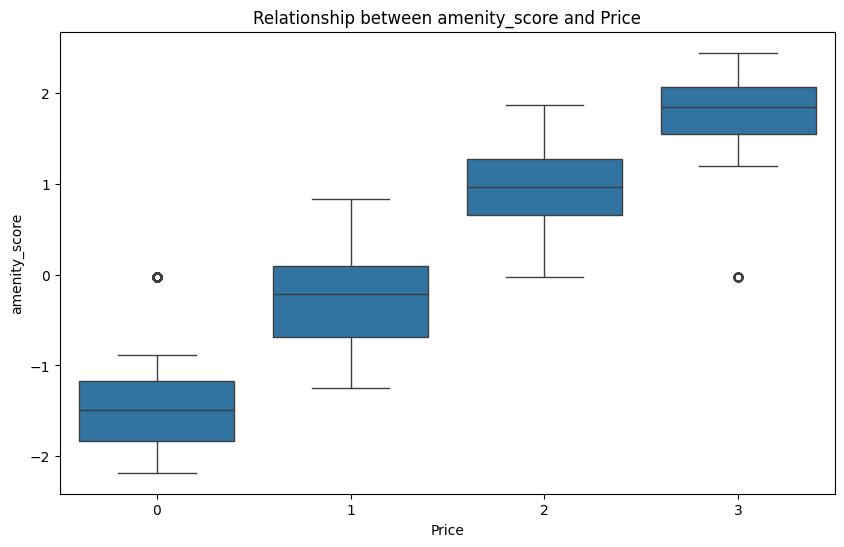

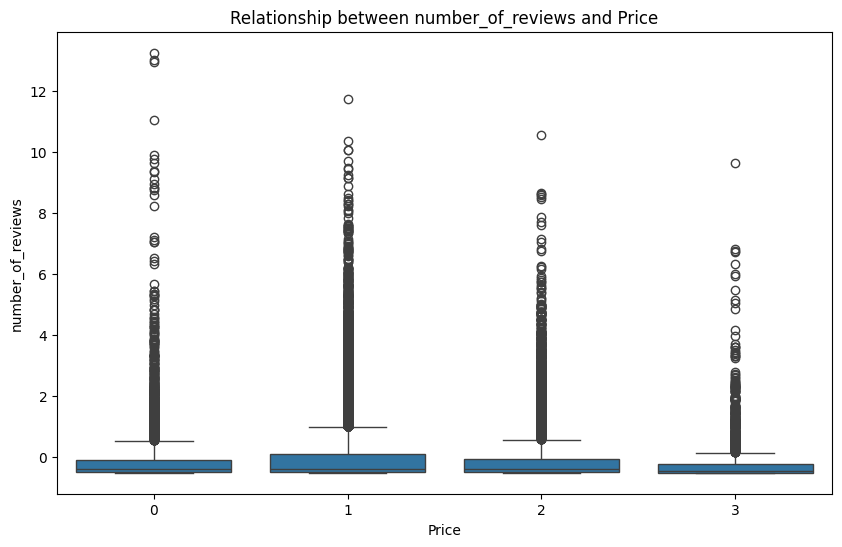

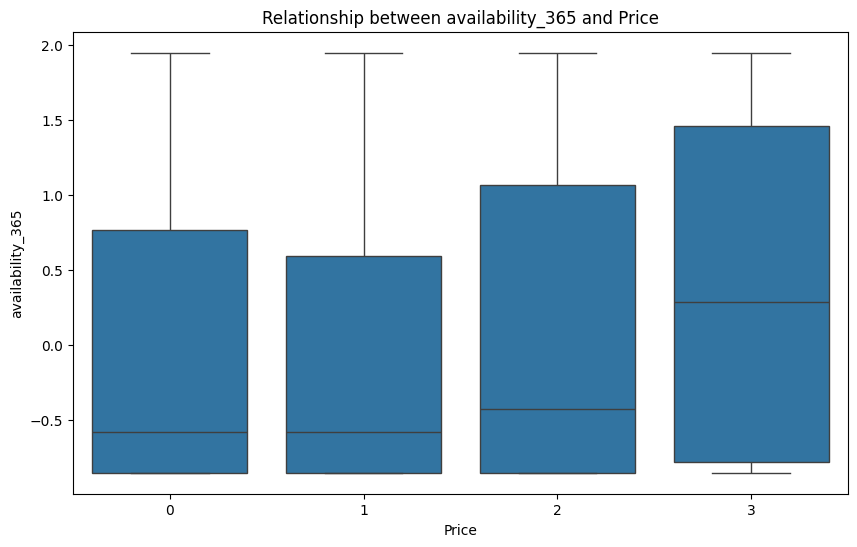

In [145]:
# Using a scatterplot to see the relationship
for col in numerical_cols_with_missing:
  plt.figure(figsize=(10, 6))
  sns.boxplot(y=col, x='price_class', data=df)
  plt.title(f'Relationship between {col} and Price')
  plt.xlabel('Price')
  plt.ylabel(col)
  plt.show()

In [146]:
# Select your one-hot columns and the price
cols_to_check = [
    'neighbourhood_group_Brooklyn',
    'neighbourhood_group_Manhattan',
    'neighbourhood_group_Queens',
    'neighbourhood_group_Staten Island',
    'room_type_Private room',
    'room_type_Shared room'
]

# Combine X_train (with one-hot encoded features) and Y_train for correlation calculation
df_combined = pd.concat([X_train, Y_train.rename('price_class')], axis=1)

# Add 'price_class' to the list of columns to check
full_cols_to_check = cols_to_check + ['price_class']

# Check correlation on the combined DataFrame
print(df_combined[full_cols_to_check].corr()['price_class'].sort_values(ascending=False))

price_class                          1.000000
neighbourhood_group_Manhattan        0.319014
neighbourhood_group_Staten Island   -0.044110
room_type_Shared room               -0.145376
neighbourhood_group_Queens          -0.170367
neighbourhood_group_Brooklyn        -0.176503
room_type_Private room              -0.496027
Name: price_class, dtype: float64


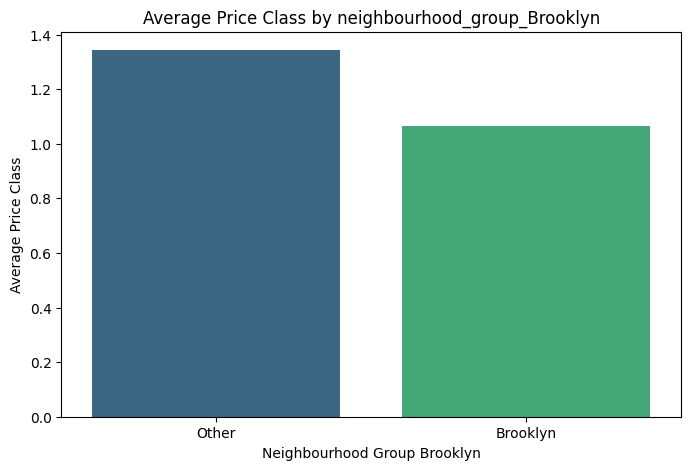

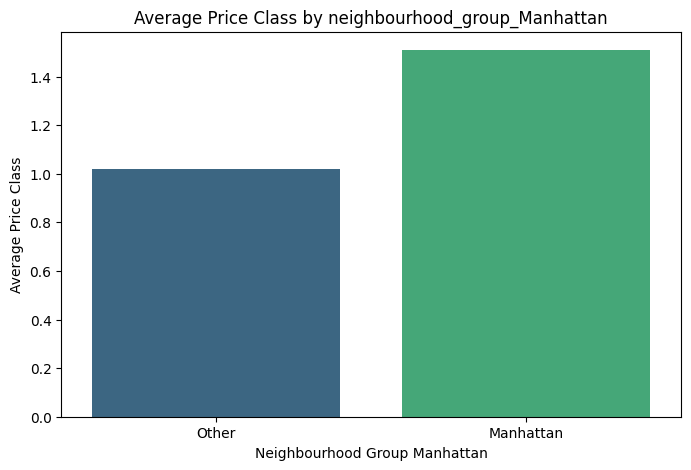

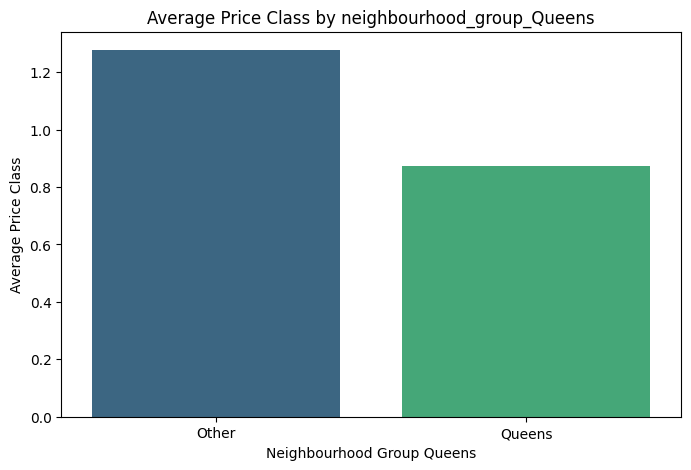

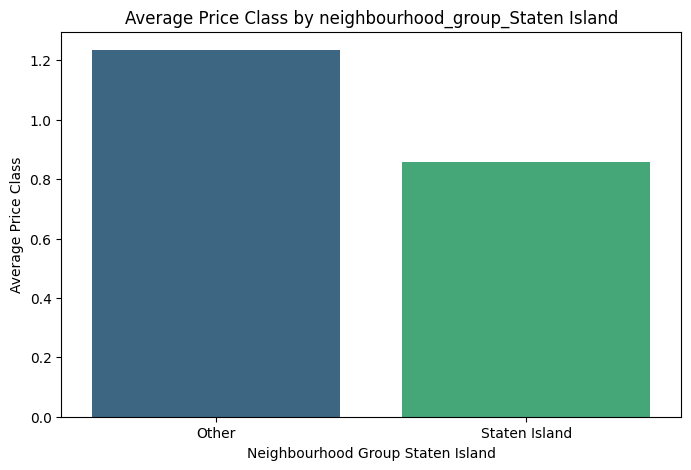

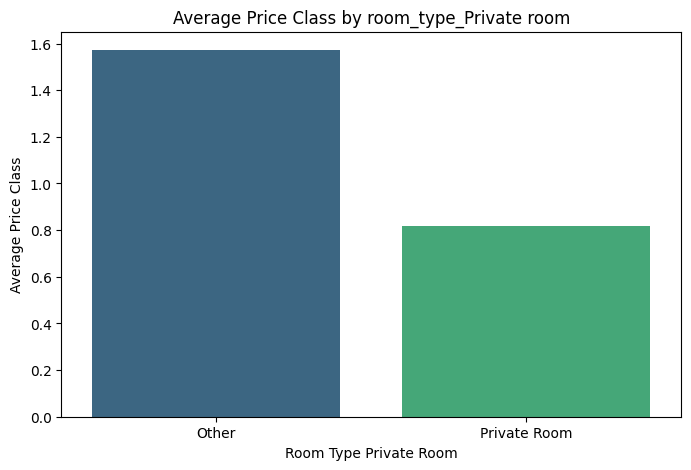

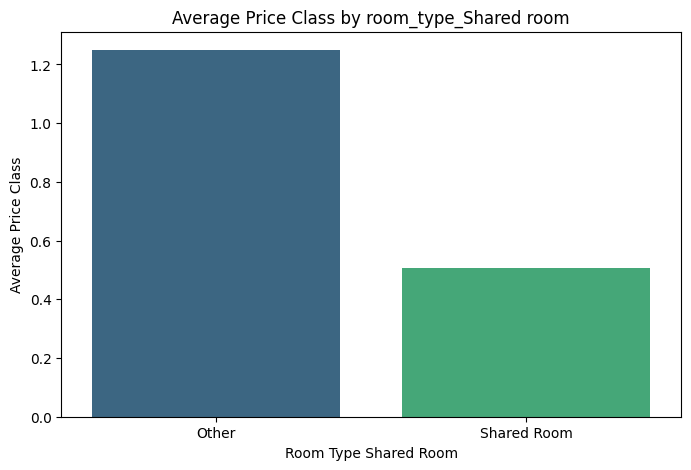

In [147]:
one_hot_cols_to_plot = [
    'neighbourhood_group_Brooklyn',
    'neighbourhood_group_Manhattan',
    'neighbourhood_group_Queens',
    'neighbourhood_group_Staten Island',
    'room_type_Private room',
    'room_type_Shared room'
]

# Create a temporary DataFrame for plotting, applying one-hot encoding to df_raw
df_temp_encoded = df_raw.copy()
categorical_cols = ['neighbourhood_group', 'room_type']
df_temp_encoded = pd.get_dummies(df_temp_encoded, columns=categorical_cols, drop_first=True, dtype=int)

for col in one_hot_cols_to_plot:
    # Group by the one-hot encoded column from the temporary DataFrame and calculate the mean price_class
    avg_price_class = df_temp_encoded.groupby(col)['price_class'].mean().reset_index()

    plt.figure(figsize=(8, 5))
    sns.barplot(x=col, y='price_class', data=avg_price_class, palette='viridis', hue=col, legend=False)
    plt.title(f'Average Price Class by {col}')
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel('Average Price Class')
    plt.xticks(ticks=[0, 1], labels=['Other', col.split('_')[-1].title().replace('group ', '').replace('room ', '')])
    plt.show()

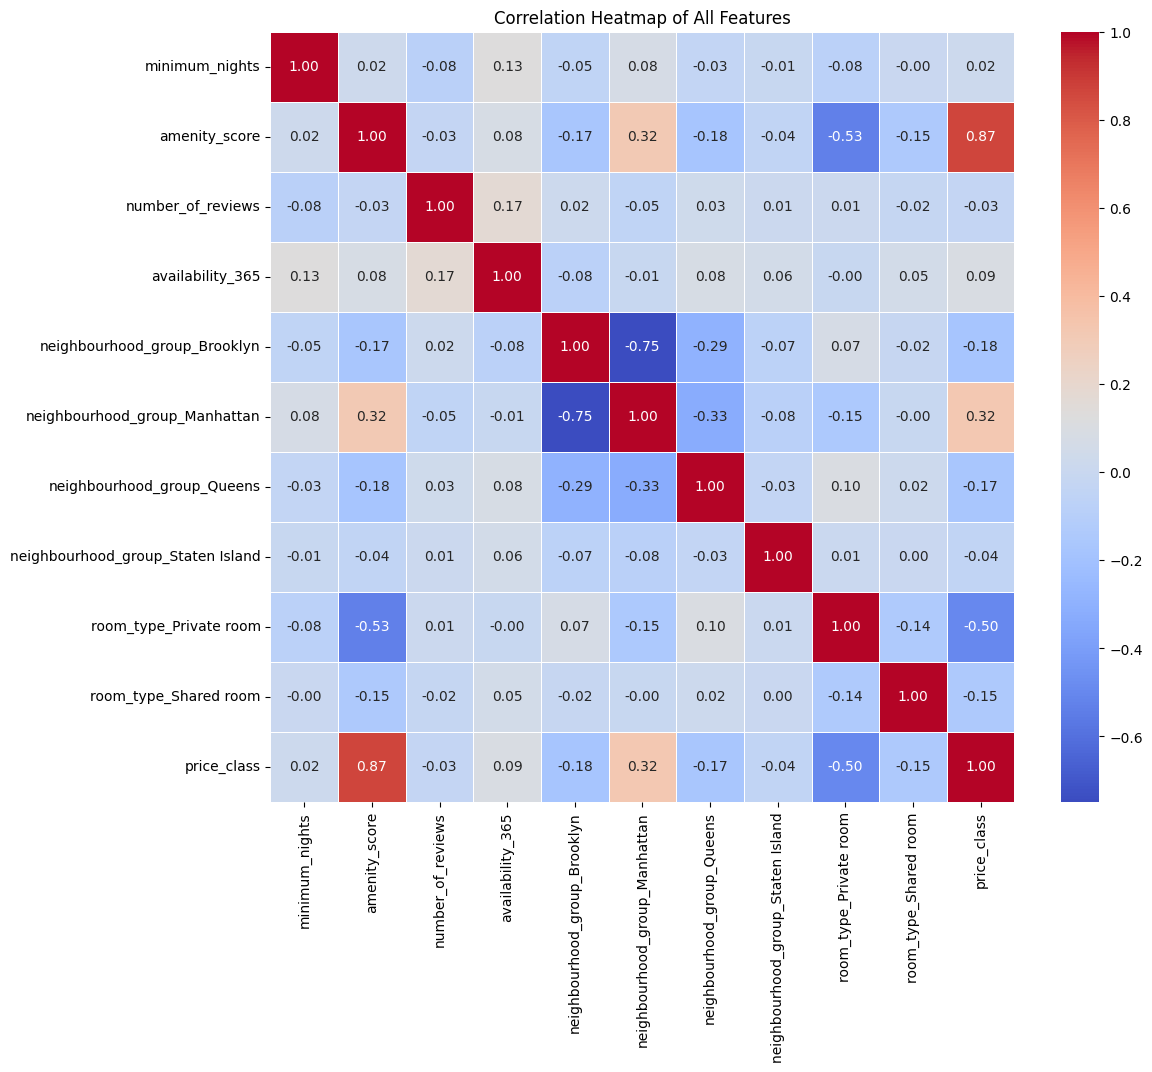

In [148]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_combined.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of All Features')
plt.show()

# Correlation matrix among numerical features

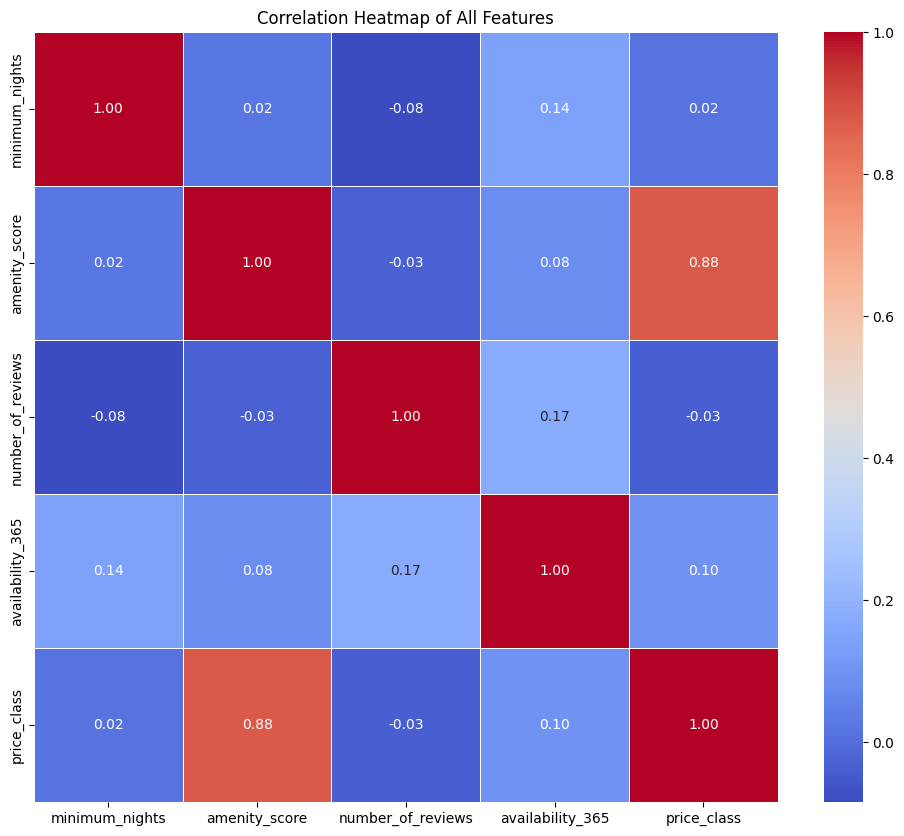

In [149]:
numerical_features_and_target = ['minimum_nights', 'amenity_score', 'number_of_reviews', 'availability_365', 'price_class']

plt.figure(figsize=(12, 10))
sns.heatmap(df_raw[numerical_features_and_target].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of All Features')
plt.show()

# amenity_score and price_class:
This pair shows a very strong positive correlation of 0.865. This is the most significant relationship observed among the numerical features. It indicates that as the amenity_score increases, the price_class also tends to increase significantly. This suggests that the availability and quality of amenities are major drivers for the pricing category of a listing.

#  Most influential for prediction

**amenity_score:** This feature stands out as the most influential. It exhibits a very strong positive correlation of 0.865 with price_class (as seen in the numerical correlations discussed, and implicitly visible in the overall correlation heatmap)

**room_type_Private room:** This one-hot encoded feature shows a strong negative correlation of -0.495 with price_class. The bar plots confirm that listings categorized as a 'Private room' tend to have a significantly lower average price_class compared to other room types (especially 'Entire home/apt').

**neighbourhood_group_Manhattan:** This feature has a notable positive correlation of 0.319 with price_class. The bar plots clearly demonstrate that listings in Manhattan have a considerably higher average price_class than those in other neighborhoods.


# Unusually predictive or suspiciously dominant

The feature that appears most dominant is amenity_score with its correlation of 0.865 with price_class.

This can be seen from the correlation matrices.

# Part B (a)



In [150]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    x_exp = np.exp(x - np.max(x, axis = 0, keepdims = True))
    softmax = x_exp / np.sum(x_exp, axis = 0, keepdims = True)
    return softmax

def apply_activation(x, activation_fn):
    return activation_fn(x)

def relu_derivative(x):
    return (x > 0).astype(int)

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def init_parameter(input_dim, hidden_dim_1, hidden_dim_2, output_dim):
    np.random.seed(42) # for reproducibility

    W1 = np.random.randn(hidden_dim_1, input_dim) * 0.01
    b1 = np.zeros((hidden_dim_1, 1))
    W2 = np.random.randn(hidden_dim_2, hidden_dim_1) * 0.01 # Weights for connection between first and second hidden layer
    b2 = np.zeros((hidden_dim_2, 1))
    W3 = np.random.randn(output_dim, hidden_dim_2) * 0.01 # Weights for connection between second hidden layer and output
    b3 = np.zeros((output_dim, 1))

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3}
    return parameters

def cross_entropy_loss(Y_true, A2):
    n_samples = Y_true.shape[1]
    epsilon = 1e-10
    A2 = np.clip(A2, epsilon, 1 - epsilon)
    loss = -np.sum(Y_true * np.log(A2)) / n_samples
    return loss

def linear_forward(X, W, b):
    Z = np.dot(W, X) + b
    return Z

In [151]:
def three_layer_forward_propagation(X, W1, b1, activation1, W2, b2, activation2, W3, b3, activation3):
    """Performs forward propagation for a three-layer neural network (two hidden layers)."""
    # Layer 1 (Input to First Hidden)
    Z1 = linear_forward(X, W1, b1)
    A1 = apply_activation(Z1, activation1)

    # Layer 2 (First Hidden to Second Hidden)
    Z2 = linear_forward(A1, W2, b2)
    A2 = apply_activation(Z2, activation2)

    # Layer 3 (Second Hidden to Output)
    Z3 = linear_forward(A2, W3, b3)
    A3 = apply_activation(Z3, activation3)

    return A3

In [152]:
def backward_prop(X, Y, parameters, forwardpass_activations, activation_derivative):
  m = X.shape[1]
  W1, b1, W2, b2, W3, b3 = parameters
  Z1, A1, Z2, A2, Z3, A3 = forwardpass_activations

  # Need to nudge parameters in such a way that L function reduces

  # layer - 3
  dL_dZ3 = A3 - Y

  dZ3_dW3 = A2.T
  dL_dW3 = (1/m) * np.dot(dL_dZ3, dZ3_dW3)

  dZ3_db3 = 1
  # dL_db3 = (1/m) * np.sum(np.dot(dL_dZ3 ,dZ3_db3), axis=1, keepdims=True)
  dL_db3 = (1/m) * np.sum(dL_dZ3 , axis=1, keepdims=True)


  # LAYER - 2
  dZ3_dA2 = W3.T
  dL_dA2 = np.dot(dZ3_dA2, dL_dZ3) # Switched positions

  dA2_dZ2 = activation_derivative(Z2) # Here A2 is f(z2)
  dL_dZ2 = dL_dA2 * dA2_dZ2

  dZ2_dW2 = A1.T
  dL_dW2 = (1/m) * np.dot(dL_dZ2, dZ2_dW2)

  dZ2_db2 = 1
  # dL_db2 = (1/m) * np.sum(np.dot(dL_dZ2, dZ2_db2), axis=1, keepdims=True)
  dL_db2 = (1/m) * np.sum(dL_dZ2, axis=1, keepdims=True)


  # LAYER - 1
  dZ2_dA1 = W2.T
  dL_dA1 = np.dot(dZ2_dA1, dL_dZ2) # SWITCHED POSTITIONS

  dA1_dZ1 = activation_derivative(Z1) # Here A2 is f(z2)
  dL_dZ1 = dL_dA1 * dA1_dZ1

  dZ1_dW1 = X.T
  dL_dW1 = (1/m) * np.dot(dL_dZ1 , dZ1_dW1)

  dZ1_db1 = 1
  # dL_db1 = (1/m) * np.sum(np.dot(dL_dZ1 * dZ1_db1), axis=1, keepdims=True)
  dL_db1 = (1/m) * np.sum(dL_dZ1, axis=1, keepdims=True)


  pass_gradients = (dL_dW1, dL_db1, dL_dW2, dL_db2, dL_dW3, dL_db3)
  return pass_gradients

In [153]:
input_dim = X_train.shape[1]
output_dim = Y_train_one_hot.shape[0]
hidden_dim_1 = 64
hidden_dim_2 = 32

relu_parameters = init_parameter(input_dim, hidden_dim_1, hidden_dim_2, output_dim)

print("Neural network parameters initialized for ReLU training.")
print(f"Input Dimension: {input_dim}")
print(f"Output Dimension: {output_dim}")
print("Parameters (weights and biases) for ReLU network:")
for key, value in relu_parameters.items():
    print(f"  {key}: shape {value.shape}")

Neural network parameters initialized for ReLU training.
Input Dimension: 10
Output Dimension: 4
Parameters (weights and biases) for ReLU network:
  W1: shape (64, 10)
  b1: shape (64, 1)
  W2: shape (32, 64)
  b2: shape (32, 1)
  W3: shape (4, 32)
  b3: shape (4, 1)


In [129]:
learning_rate = 0.01
relu_losses = []

W1 = relu_parameters["W1"]
b1 = relu_parameters["b1"]
W2 = relu_parameters["W2"]
b2 = relu_parameters["b2"]
W3 = relu_parameters["W3"]
b3 = relu_parameters["b3"]

X_train_T = X_train.T

# Ensure Y_train_one_hot has the correct shape (num_classes, num_samples)
# It's already transposed from earlier steps, so just verify.

for i in range(201): # At least 200 iterations, so going to 201 to make sure 200 iterations are run
    # Forward Propagation
    Z1 = linear_forward(X_train_T, W1, b1)
    A1 = relu(Z1)

    Z2 = linear_forward(A1, W2, b2)
    A2 = relu(Z2)

    Z3 = linear_forward(A2, W3, b3)
    A3 = softmax(Z3)

    forwardpass_activations = (Z1, A1, Z2, A2, Z3, A3)

    # Calculate Loss
    loss = cross_entropy_loss(Y_train_one_hot, A3)
    relu_losses.append(loss)

    # Backward Propagation
    current_parameters = (W1, b1, W2, b2, W3, b3)
    dL_dW1, dL_db1, dL_dW2, dL_db2, dL_dW3, dL_db3 = backward_prop(X_train_T, Y_train_one_hot, current_parameters, forwardpass_activations, relu_derivative)

    # Update Parameters
    W1 = W1 - learning_rate * dL_dW1
    b1 = b1 - learning_rate * dL_db1
    W2 = W2 - learning_rate * dL_dW2
    b2 = b2 - learning_rate * dL_db2
    W3 = W3 - learning_rate * dL_dW3
    b3 = b3 - learning_rate * dL_db3

    if i % 50 == 0:
        print(f"Iteration {i}, Loss: {loss:.4f}")

print(f"Final training loss for ReLU network: {relu_losses[-1]:.4f}")

Iteration 0, Loss: 1.3863
Iteration 50, Loss: 1.3216
Iteration 100, Loss: 1.2722
Iteration 150, Loss: 1.2347
Iteration 200, Loss: 1.2066
Final training loss for ReLU network: 1.2066


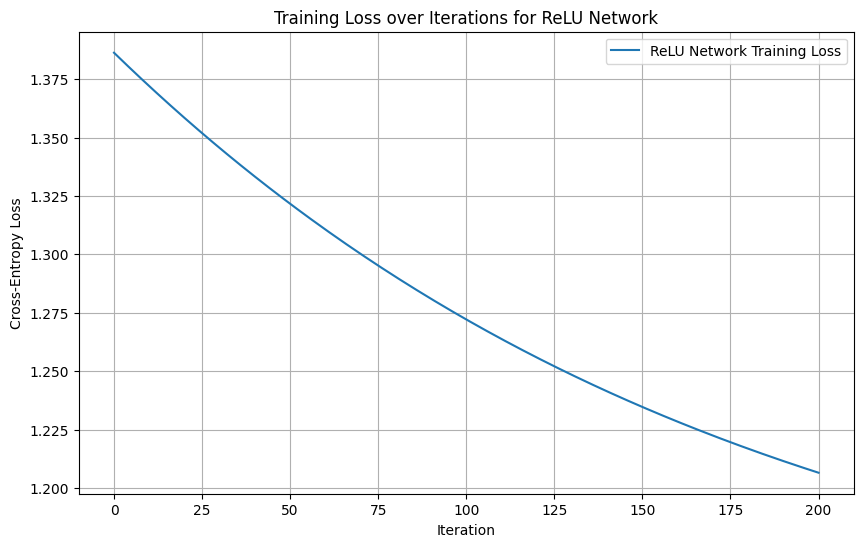

In [130]:
plt.figure(figsize=(10, 6))
plt.plot(relu_losses, label='ReLU Network Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training Loss over Iterations for ReLU Network')
plt.grid(True)
plt.legend()
plt.show()


In [131]:
sigmoid_parameters = init_parameter(input_dim, hidden_dim_1, hidden_dim_2, output_dim)

print("Neural network parameters initialized for Sigmoid training.")
print(f"Input Dimension: {input_dim}")
print(f"Output Dimension: {output_dim}")
print("Parameters (weights and biases) for Sigmoid network:")
for key, value in sigmoid_parameters.items():
    print(f"  {key}: shape {value.shape}")

Neural network parameters initialized for Sigmoid training.
Input Dimension: 10
Output Dimension: 4
Parameters (weights and biases) for Sigmoid network:
  W1: shape (64, 10)
  b1: shape (64, 1)
  W2: shape (32, 64)
  b2: shape (32, 1)
  W3: shape (4, 32)
  b3: shape (4, 1)


In [132]:
learning_rate = 0.01
sigmoid_losses = []

W1 = sigmoid_parameters["W1"]
b1 = sigmoid_parameters["b1"]
W2 = sigmoid_parameters["W2"]
b2 = sigmoid_parameters["b2"]
W3 = sigmoid_parameters["W3"]
b3 = sigmoid_parameters["b3"]

# Ensure X_train_T is already transposed from previous steps
# If not, add: X_train_T = X_train.T
# Assuming X_train_T is already defined and correct from the ReLU training section

for i in range(201): # At least 200 iterations
    # Forward Propagation
    Z1 = linear_forward(X_train_T, W1, b1)
    A1 = sigmoid(Z1)

    Z2 = linear_forward(A1, W2, b2)
    A2 = sigmoid(Z2)

    Z3 = linear_forward(A2, W3, b3)
    A3 = softmax(Z3)

    forwardpass_activations = (Z1, A1, Z2, A2, Z3, A3)

    # Calculate Loss
    loss = cross_entropy_loss(Y_train_one_hot, A3)
    sigmoid_losses.append(loss)

    # Backward Propagation
    current_parameters = (W1, b1, W2, b2, W3, b3)
    dL_dW1, dL_db1, dL_dW2, dL_db2, dL_dW3, dL_db3 = backward_prop(X_train_T, Y_train_one_hot, current_parameters, forwardpass_activations, sigmoid_derivative)

    # Update Parameters
    W1 = W1 - learning_rate * dL_dW1
    b1 = b1 - learning_rate * dL_db1
    W2 = W2 - learning_rate * dL_dW2
    b2 = b2 - learning_rate * dL_db2
    W3 = W3 - learning_rate * dL_dW3
    b3 = b3 - learning_rate * dL_db3

    if i % 50 == 0:
        print(f"Iteration {i}, Loss: {loss:.4f}")

print(f"Final training loss for Sigmoid network: {sigmoid_losses[-1]:.4f}")

Iteration 0, Loss: 1.3692
Iteration 50, Loss: 1.1393
Iteration 100, Loss: 1.1180
Iteration 150, Loss: 1.1135
Iteration 200, Loss: 1.1121
Final training loss for Sigmoid network: 1.1121


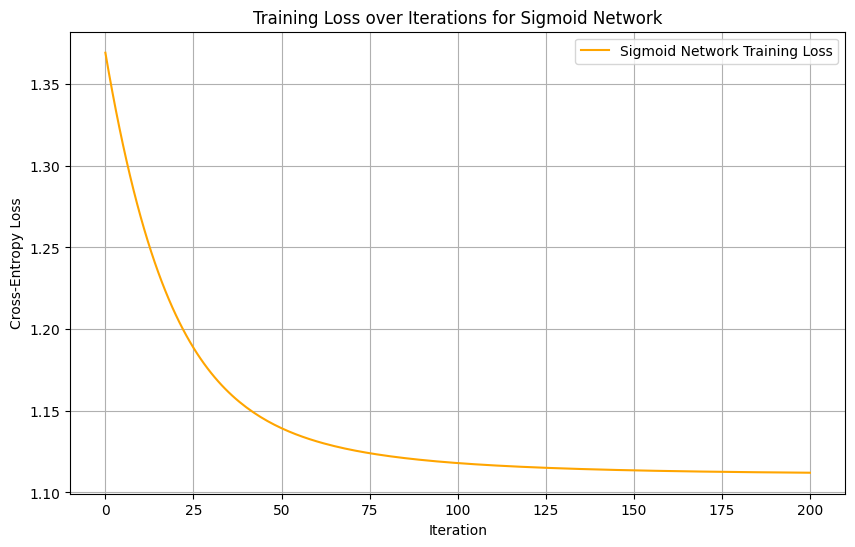

In [133]:
plt.figure(figsize=(10, 6))
plt.plot(sigmoid_losses, label='Sigmoid Network Training Loss', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training Loss over Iterations for Sigmoid Network')
plt.grid(True)
plt.legend()
plt.show()

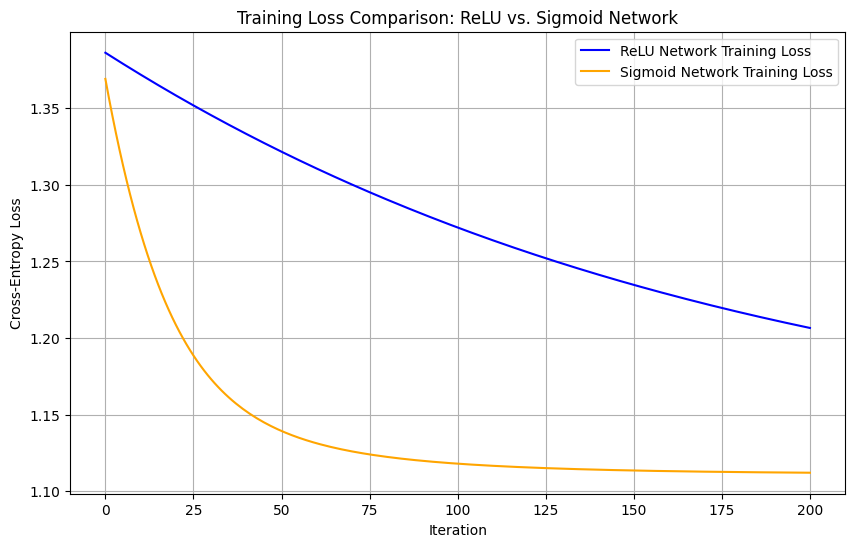

In [134]:
plt.figure(figsize=(10, 6))
plt.plot(relu_losses, label='ReLU Network Training Loss', color='blue')
plt.plot(sigmoid_losses, label='Sigmoid Network Training Loss', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training Loss Comparison: ReLU vs. Sigmoid Network')
plt.grid(True)
plt.legend()
plt.show()